# Seperate dataset by ethnicity: White, South Asian and create serate prediction models

In [25]:
# Importing the libraries
import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer, make_column_selector as selector
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import recall_score, precision_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from matplotlib import pyplot

In [26]:
def preprocess (X):
    # define categorical and numeric transformers
    numeric_transformer = Pipeline(steps=[
        ('knnImputer', KNNImputer(n_neighbors=2, weights="uniform")),
        ('scaler', StandardScaler())])

    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))])

    #  dispatch object columns to the categorical_transformer and remaining columns to numerical_transformer
    preprocessor = ColumnTransformer(transformers=[
        ('cat', categorical_transformer, selector(dtype_include=['object'])),
        ('num', numeric_transformer, selector(dtype_include=['float64','int64']))
    ])

    X = pd.DataFrame(preprocessor.fit_transform(X))
    return X

In [27]:
def encode(y):
    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()
    y = le.fit_transform(y)
    
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print(le_name_mapping)
    
    return y

In [28]:
# define f0.5 score
from sklearn.metrics import fbeta_score, make_scorer
f05_score = make_scorer(fbeta_score, beta=0.5)

In [29]:
def compareAlgorithmsForBarChart(X_train, y_train):
    # Compare Algorithms
    import pandas
    from sklearn import model_selection
    from sklearn.linear_model import LogisticRegression
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.naive_bayes import GaussianNB
    from sklearn.svm import SVC, LinearSVC
    from sklearn.neural_network import MLPClassifier
    from sklearn.naive_bayes import GaussianNB
    from sklearn.model_selection import StratifiedKFold
  
    # prepare configuration for cross validation test harness
    seed = 7

    # prepare models
    models = []
    models.append(('LR', LogisticRegression()))
    #models.append(('SVM', SVC()))
    models.append(('Linear SVC', LinearSVC()))
    models.append(('NB', GaussianNB()))
    models.append(('MLP', MLPClassifier()))
    models.append(('DT', DecisionTreeClassifier()))
    models.append(('ADABOOST', AdaBoostClassifier()))


    # evaluate each model in turn
    
    names = []
    precision_results=[]
    recall_results=[]
    f1_results=[]
    f05_results=[]

    
    # make splits for cross-validation
    skf = StratifiedKFold(n_splits=5, shuffle=False)
    
    for name, model in models:
        names.append(name)

        # calculate scores
            
        precision_cv_results = model_selection.cross_val_score(model, X_train,
                                                               y_train, cv=skf, scoring='precision')
        recall_cv_results = model_selection.cross_val_score(model, X_train,
                                                            y_train, cv=skf, scoring='recall')
        f1_cv_results = model_selection.cross_val_score(model, X_train,
                                                         y_train, cv=skf, scoring='f1')
        f05_cv_results = model_selection.cross_val_score(model, X_train,
                                                         y_train, cv=skf, scoring=f05_score)
        

        precision_results.append(precision_cv_results.mean())
        #print(precision_results)    # for testing only
        recall_results.append(recall_cv_results.mean())
        #print(recall_results)    # for testing only
        f1_results.append(f1_cv_results.mean())
        #print(f1_results)    # for testing only
        f05_results.append(f05_cv_results.mean())
        #print(f05_results)    # for testing only
        
        
    return precision_results, recall_results, f1_results, f05_results, names

In [68]:
def threeGroupsBarChart(results1, string1, results2, string2, results3, string3, score, title, name):
    import matplotlib
    import matplotlib.pyplot as plt
    import numpy as np


    labels = ['LR', 'Linear SVC', 'NB', 'MLP', 'DT', 'ADABOOST']

    y = np.arange(len(labels))  # the label locations
    width = 0.2  # the width of the bars

    fig, ax = plt.subplots()
    rects1 = ax.barh(y - width, results1, width, label=string1)
    rects2 = ax.barh(y, results2, width, label=string2)
    rects3 = ax.barh(y + width, results3, width, label=string3)

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_yticks(y, labels=labels)
    ax.invert_yaxis()  # labels read top-to-bottom
    #ax.set_ylabel(labels)
    ax.set_title(title)
    ax.set_xlabel(score)
    #ax.set_xticklabels(labels)
    #ax.legend()
    
    plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
    #plt.legend()
    
    plt.xlim(0,1)
    
    
    # label bars
    ax.bar_label(rects1, padding=3, fmt='%.2f', label_type='edge', fontsize=8)
    ax.bar_label(rects2, padding=3, fmt='%.2f', label_type='edge', fontsize=8)
    ax.bar_label(rects3, padding=3, fmt='%.2f', label_type='edge', fontsize=8)

    fig.tight_layout()
    
    fileName = name +'.png'
    print(fileName)
    plt.savefig('figures/whiteVsAsian/' + fileName, bbox_inches='tight')
    
    plt.show()

In [65]:
def compareAlgorithmsRUS(X_train, y_train):
    # Compare Algorithms
    import pandas
    from sklearn import model_selection
    from sklearn.linear_model import LogisticRegression
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
    from sklearn.naive_bayes import GaussianNB
    from sklearn.svm import SVC, LinearSVC
    from sklearn.model_selection import StratifiedKFold        
    from imblearn.pipeline import Pipeline, make_pipeline
    from imblearn.under_sampling import RandomUnderSampler
    from sklearn.neural_network import MLPClassifier


    # prepare configuration for cross validation test harness
    seed = 7

    # prepare models
    models = []
    models.append(('LR', LogisticRegression()))
    models.append(('Linear SVC', LinearSVC()))
    models.append(('NB', GaussianNB()))
    models.append(('MLP', MLPClassifier()))
    models.append(('DT', DecisionTreeClassifier()))
    models.append(('ADABOOST', AdaBoostClassifier()))



    # evaluate each model in turn
    precision_results = []
    recall_results = []
    f1_results = []
    f05_results = []

    names = []
        
    for name, model in models:
        skf = StratifiedKFold(n_splits=5, shuffle=False) 
    
        imba_pipeline = make_pipeline(RandomUnderSampler(random_state=42), model)
        
        precision_cv_results = model_selection.cross_val_score(imba_pipeline, X_train, y_train, cv=skf, 
                                                     scoring='precision')
        recall_cv_results = model_selection.cross_val_score(imba_pipeline, X_train, y_train, cv=skf, 
                                                     scoring='recall')
        f1_cv_results = model_selection.cross_val_score(imba_pipeline, X_train, y_train, cv=skf, 
                                                     scoring='f1')
        f05_cv_results = model_selection.cross_val_score(imba_pipeline, X_train, y_train, cv=skf, 
                                                     scoring=f05_score)

        precision_results.append(precision_cv_results.mean())
        recall_results.append(recall_cv_results.mean())
        f1_results.append(f1_cv_results.mean())
        f05_results.append(f05_cv_results.mean())


        names.append(name)
        #msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        #print(msg)
        
    #print("Precision Results:", precision_results)    
    #print("Recall Results:",recall_results)
    
    return precision_results, recall_results, f1_results, f05_results, names

In [66]:
def compareAlgorithmsSMOTE(X_train, y_train):
    # Compare Algorithms
    import pandas
    from sklearn import model_selection
    from sklearn.linear_model import LogisticRegression
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
    from sklearn.naive_bayes import GaussianNB
    from sklearn.svm import SVC, LinearSVC
    from sklearn.model_selection import StratifiedKFold        
    from imblearn.pipeline import Pipeline, make_pipeline
    from imblearn.over_sampling import SMOTE
    from sklearn.neural_network import MLPClassifier

    # prepare configuration for cross validation test harness
    seed = 7

    # prepare models
    models = []
    models.append(('LR', LogisticRegression()))
    models.append(('Linear SVC', LinearSVC()))
    models.append(('NB', GaussianNB()))
    models.append(('MLP', MLPClassifier()))
    models.append(('DT', DecisionTreeClassifier()))
    models.append(('ADABOOST', AdaBoostClassifier()))


    # evaluate each model in turn
    precision_results = []
    recall_results = []
    f1_results = []
    f05_results = []

    names = []
        
    for name, model in models:
        skf = StratifiedKFold(n_splits=5, shuffle=False)
        
        imba_pipeline = make_pipeline(SMOTE(random_state=42), model)
        
        precision_cv_results = model_selection.cross_val_score(imba_pipeline, X_train, y_train, cv=skf, 
                                                     scoring='precision')
        recall_cv_results = model_selection.cross_val_score(imba_pipeline, X_train, y_train, cv=skf, 
                                                     scoring='recall')
        f1_cv_results = model_selection.cross_val_score(imba_pipeline, X_train, y_train, cv=skf, 
                                                     scoring='f1')

        f05_cv_results = model_selection.cross_val_score(imba_pipeline, X_train, y_train, cv=skf, 
                                                     scoring=f05_score)

        precision_results.append(precision_cv_results.mean())
        recall_results.append(recall_cv_results.mean())
        f1_results.append(f1_cv_results.mean())
        f05_results.append(f05_cv_results.mean())


        names.append(name)
        #msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        #print(msg)
        
    #print("Precision Results:", precision_results)    
    #print("Recall Results:",recall_results)
    
    return precision_results, recall_results, f1_results, f05_results, names

## Read full BiB dataset and then separate by ethnicity

In [33]:
df= pd.read_csv('BiBFullDataset.csv')

# drop ids
#df = df.drop(columns=['ChildID', 'PregnancyID','MotherID'])
#y = df['lga']
#df.info()

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12977 entries, 0 to 12976
Data columns (total 34 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ethnicity             10706 non-null  object 
 1   maternalDiabetes      12422 non-null  object 
 2   fhEclampsia           10594 non-null  object 
 3   gdm                   10592 non-null  object 
 4   gdmDiet               12977 non-null  object 
 5   gdmInsulin            12977 non-null  object 
 6   gdmLifestyle          12977 non-null  object 
 7   gdmMetformin          12977 non-null  object 
 8   gdmNoTreatment        12977 non-null  object 
 9   gdmNotDoc             12977 non-null  object 
 10  gestHypertension      10582 non-null  object 
 11  gestEclampsia         10582 non-null  object 
 12  fhDiabetes            10594 non-null  object 
 13  pregdm                4653 non-null   object 
 14  premacrosomia         5740 non-null   object 
 15  maternalAge        

In [35]:
df['lga'].value_counts(normalize=True).round(2)*100

No     93.0
Yes     7.0
Name: lga, dtype: float64

In [36]:
#setting dropna=False includes NaNs in values being counted
df['ethnicity'].value_counts(dropna=False)

South Asian    5520
White          4516
NaN            2271
Other           670
Name: ethnicity, dtype: int64

In [37]:
df['ethnicity'].value_counts(dropna=False, normalize=True)*100
#setting dropna=False here results in correct percentages since observations with NaNs
# are counted when calculating percentage

South Asian    42.536796
White          34.800031
NaN            17.500193
Other           5.162981
Name: ethnicity, dtype: float64

In [38]:
df['ethnicity'].value_counts()

South Asian    5520
White          4516
Other           670
Name: ethnicity, dtype: int64

In [39]:
# create two seperate dataframes, one for White women and one for South Asian women

In [40]:
df_white = df[df['ethnicity'] == 'White']
df_white.shape

(4516, 34)

In [41]:
df_white['lga'].value_counts(normalize=True).round(3)*100

No     89.5
Yes    10.5
Name: lga, dtype: float64

In [42]:
df_white['gdm'].value_counts(normalize=True, dropna=False,).round(3)*100

No     91.0
Yes     4.6
NaN     4.4
Name: gdm, dtype: float64

In [43]:
df_asian = df[df['ethnicity'] == 'South Asian']
df_asian.shape

(5520, 34)

In [44]:
df_asian['lga'].value_counts(normalize=True).round(3)*100

No     95.5
Yes     4.5
Name: lga, dtype: float64

In [45]:
df_asian['gdm'].value_counts(normalize=True, dropna=False,).round(3)*100

No     85.3
Yes    10.2
NaN     4.5
Name: gdm, dtype: float64

% LGA infants (birthweight>90th centile) in White dataset was 11%

% LGA infants (birthweight>90th centile) in Asian dataset was 5%

So there was almost double the % of LGA infants born to White women.

# South Asian LGA Model

In [46]:
# make feature matrix and target matrix
X_asian = df_asian.drop(columns=['lga'])
y_asian = df_asian['lga']

# encode target variable 
y_asian=encode(y_asian)

X_asian=preprocess(X_asian)

# Split data into training and testing data
X_train_asian, X_test_asian, y_train_asian, y_test_asian = train_test_split(X_asian, 
                                                                            y_asian, stratify=y_asian,
                                                                            test_size=0.2, random_state=42)

{'No': 0, 'Yes': 1}


In [47]:
import warnings
warnings.filterwarnings("ignore")

In [48]:
precision_asian, recall_asian, f1_asian, f05_asian, names = compareAlgorithmsForBarChart(X_train_asian, y_train_asian)

# White LGA Model

In [49]:
# make feature matrix and target matrix
X_white = df_white.drop(columns=['lga'])
y_white = df_white['lga']

# encode target variable 
y_white=encode(y_white)

X_white=preprocess(X_white)

# Split data into training and testing data
X_train_white, X_test_white, y_train_white, y_test_white = train_test_split(X_white,
                                                                            y_white, stratify=y_white,
                                                                            test_size=0.2, random_state=42)

{'No': 0, 'Yes': 1}


In [50]:
precision_white, recall_white, f1_white, f05_white, names = compareAlgorithmsForBarChart(X_train_white, y_train_white)

In most models, the White prediction model had higher recall and precision than the South Asian model, most likely due to there being a larger number of LGA infants in White dataset.

# Mixed Dataset

In [51]:
# make feature matrix and target matrix
X = pd.read_csv('BibFeaturesMatrix_Preprocessed_OHEColumnsNamed.csv')
y = pd.read_csv('BibDependentVariableLGAEncoded.csv')

# Split data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

precision_mixed, recall_mixed, f1_mixed, f05_mixed, names = compareAlgorithmsForBarChart(X_train, y_train)

# Plot mixed vs white vs South Asian baseline models

mixedVsEthnicity_precision_baseline.png


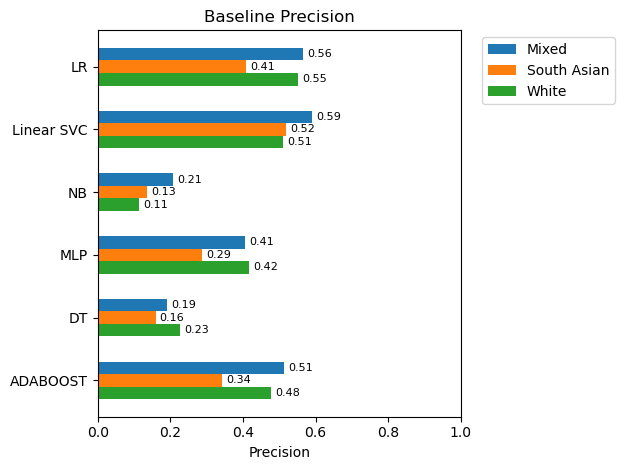

mixedVsEthnicity_recall_baseline.png


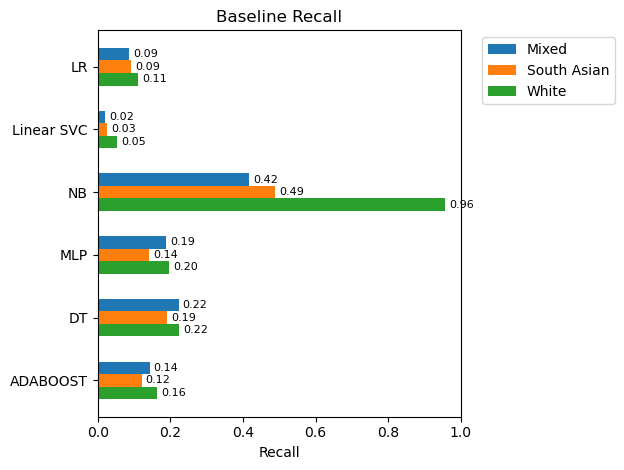

mixedVsEthnicity_f1_baseline.png


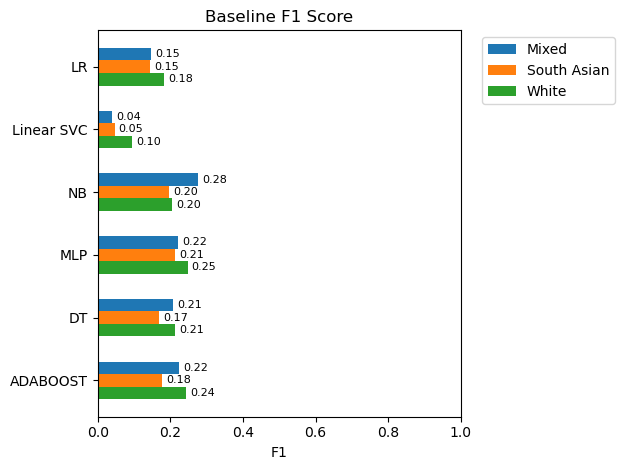

mixedVsEthnicity_f05_baseline.png


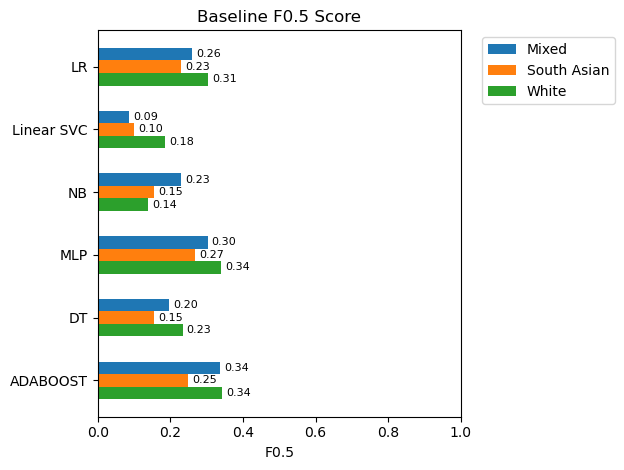

In [69]:
threeGroupsBarChart(precision_mixed, "Mixed",
                    precision_asian, "South Asian",
                    precision_white, "White",
                    "Precision", "Baseline Precision", "mixedVsEthnicity_precision_baseline")

threeGroupsBarChart(recall_mixed, "Mixed",
                    recall_asian, "South Asian", 
                    recall_white, "White",
                    "Recall", "Baseline Recall", "mixedVsEthnicity_recall_baseline")

threeGroupsBarChart(f1_mixed, "Mixed",
                    f1_asian, "South Asian", 
                    f1_white, "White",
                    "F1", "Baseline F1 Score", "mixedVsEthnicity_f1_baseline")

threeGroupsBarChart(f05_mixed, "Mixed",
                    f05_asian, "South Asian", 
                    f05_white, "White",
                    "F0.5", "Baseline F0.5 Score", "mixedVsEthnicity_f05_baseline")

# Balancing Datasets

In [58]:
# RUS results
precision_rus_asian, recall_rus_asian, f1_rus_asian, f05_rus_asian, names= compareAlgorithmsRUS(X_train_asian, y_train_asian)
precision_rus_white, recall_rus_white, f1_rus_white, f05_rus_white, names= compareAlgorithmsRUS(X_train_white, y_train_white)


# SMOTE results
precision_sm_asian, recall_sm_asian, f1_sm_asian, f05_sm_asian, names= compareAlgorithmsSMOTE(X_train_asian, y_train_asian)
precision_sm_white, recall_sm_white, f1_sm_white, f05_sm_white, names= compareAlgorithmsSMOTE(X_train_white, y_train_white)

In [54]:
def barChartBalancing(imbalancedResults, rusResults, smoteResults, score, title, name):
    import matplotlib
    import matplotlib.pyplot as plt
    import numpy as np

    #make font bigger
    font = {'size'   : 15}

    matplotlib.rc('font', **font)
    
    labels = names
    
    x = np.arange(len(labels))  # the label locations
    width = 0.2  # the width of the bars

    fig, ax = plt.subplots(figsize=(10,9))
    rects1 = ax.bar(x - width, imbalancedResults, width, label='Imbalanced Dataset')
    rects2 = ax.bar(x , rusResults, width, label='RandomUnderSampler')
    rects3 = ax.bar(x + width, smoteResults, width, label='SMOTE')
    

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel(score)
    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend(loc='upper right')

    fig.tight_layout()
    
    # annotate bars
    ax.bar_label(rects1, padding=3, fmt='%.2f', label_type='edge', fontsize=10, rotation='vertical')
    ax.bar_label(rects2, padding=3, fmt='%.2f', label_type='edge', fontsize=10, rotation='vertical')
    ax.bar_label(rects3, padding=3, fmt='%.2f', label_type='edge', fontsize=10, rotation='vertical')

    
    fileName = name +'.png'
    print(fileName)
    plt.savefig('figures/whiteVsAsian/' + fileName)

    plt.show()

imbalancedVsbalanced_white_precision.png


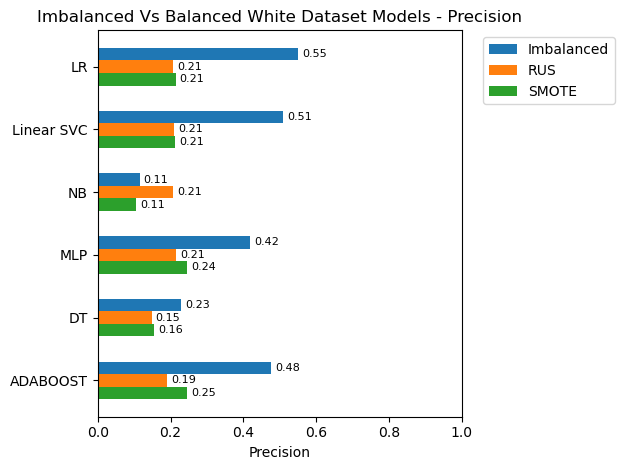

imbalancedVsbalanced_white_sensitivity.png


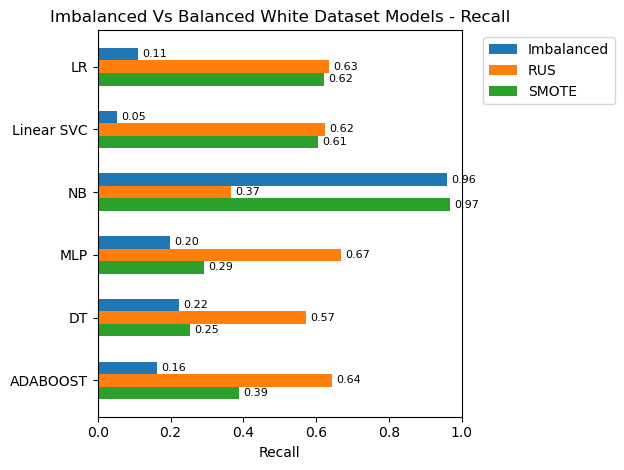

imbalancedVsbalanced_white_f1.png


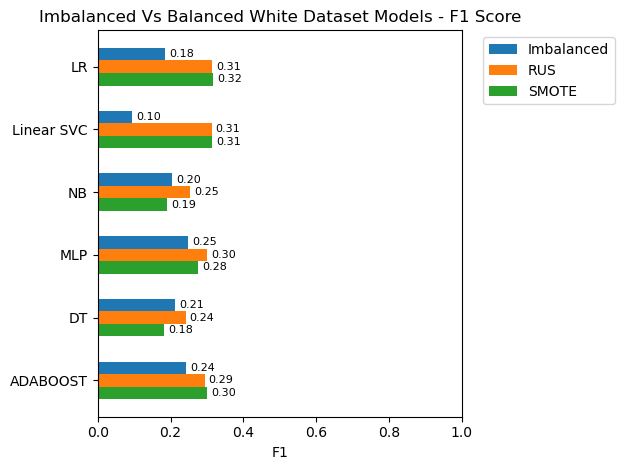

imbalancedVsbalanced_white_f05.png


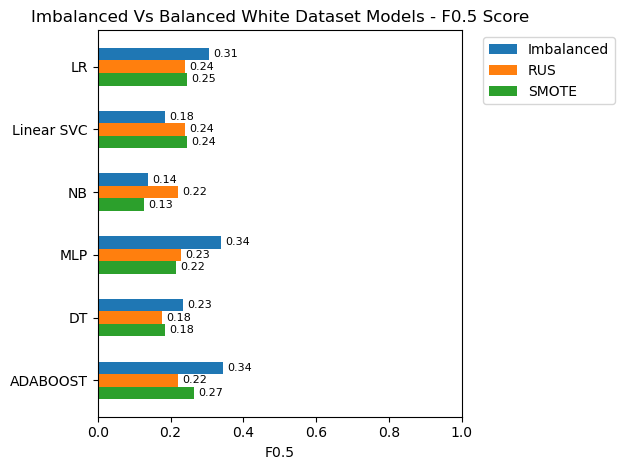

In [70]:
threeGroupsBarChart(precision_white, "Imbalanced",
                    precision_rus_white, "RUS",
                    precision_sm_white, "SMOTE",
                    "Precision", "Imbalanced Vs Balanced White Dataset Models - Precision",
                    "imbalancedVsbalanced_white_precision")

threeGroupsBarChart(recall_white, "Imbalanced",
                    recall_rus_white, "RUS", 
                    recall_sm_white, "SMOTE",
                    "Recall", "Imbalanced Vs Balanced White Dataset Models - Recall",
                    "imbalancedVsbalanced_white_sensitivity")

threeGroupsBarChart(f1_white, "Imbalanced",
                    f1_rus_white, "RUS", 
                    f1_sm_white, "SMOTE",
                    "F1", "Imbalanced Vs Balanced White Dataset Models - F1 Score",
                    "imbalancedVsbalanced_white_f1")

threeGroupsBarChart(f05_white, "Imbalanced",
                    f05_rus_white, "RUS", 
                    f05_sm_white, "SMOTE",
                    "F0.5", "Imbalanced Vs Balanced White Dataset Models - F0.5 Score",
                    "imbalancedVsbalanced_white_f05")

imbalancedVsbalanced_asian_precision.png


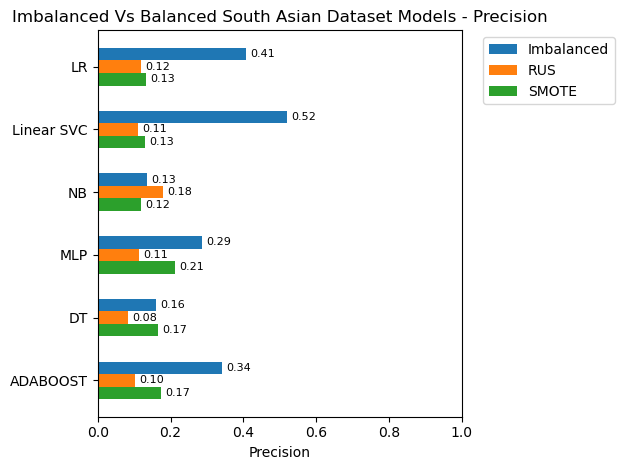

imbalancedVsbalanced_asian_sensitivity.png


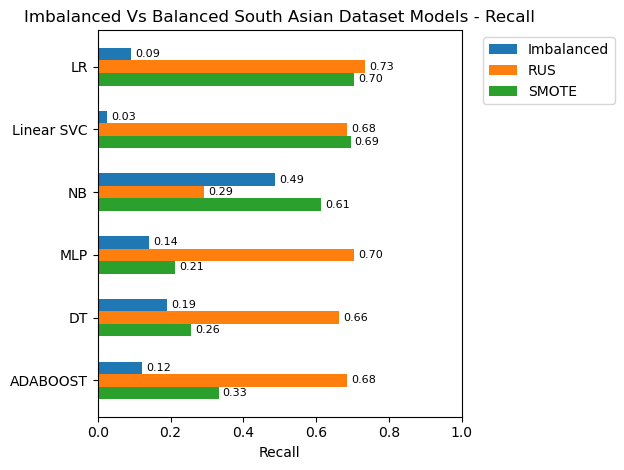

imbalancedVsbalanced_asian_f1.png


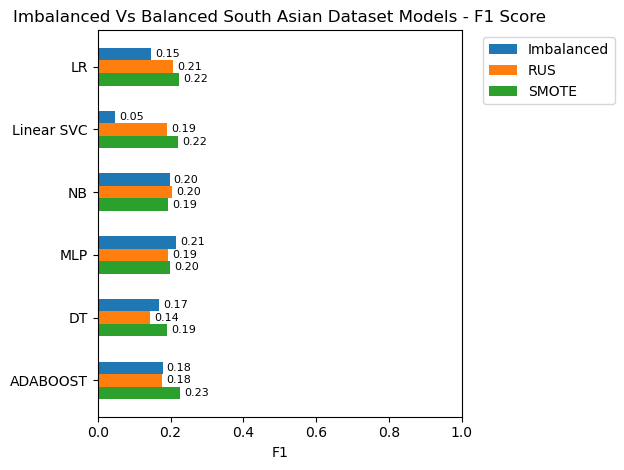

imbalancedVsbalanced_asian_f05.png


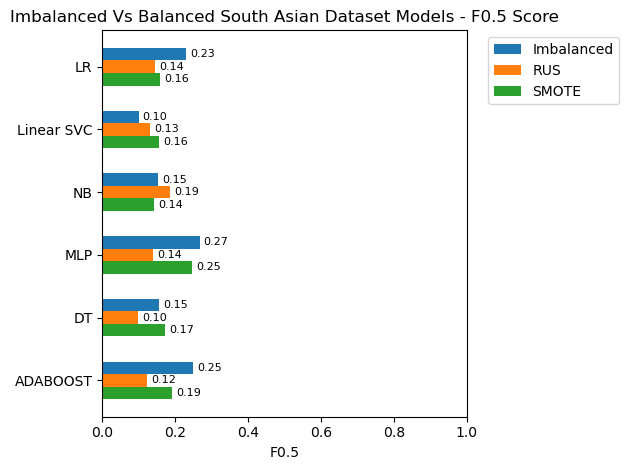

In [72]:
threeGroupsBarChart(precision_asian, "Imbalanced",
                    precision_rus_asian, "RUS",
                    precision_sm_asian, "SMOTE",
                    "Precision","Imbalanced Vs Balanced South Asian Dataset Models - Precision",
                    "imbalancedVsbalanced_asian_precision")

threeGroupsBarChart(recall_asian, "Imbalanced",
                    recall_rus_asian, "RUS", 
                    recall_sm_asian, "SMOTE",
                    "Recall", "Imbalanced Vs Balanced South Asian Dataset Models - Recall",
                    "imbalancedVsbalanced_asian_sensitivity")

threeGroupsBarChart(f1_asian, "Imbalanced",
                    f1_rus_asian, "RUS", 
                    f1_sm_asian, "SMOTE",
                    "F1", "Imbalanced Vs Balanced South Asian Dataset Models - F1 Score",
                    "imbalancedVsbalanced_asian_f1")

threeGroupsBarChart(f05_asian, "Imbalanced",
                    f05_rus_asian, "RUS", 
                    f05_sm_asian, "SMOTE",
                    "F0.5", "Imbalanced Vs Balanced South Asian Dataset Models - F0.5 Score",
                    "imbalancedVsbalanced_asian_f05")

imbalancedVsbalanced_white_precision.png


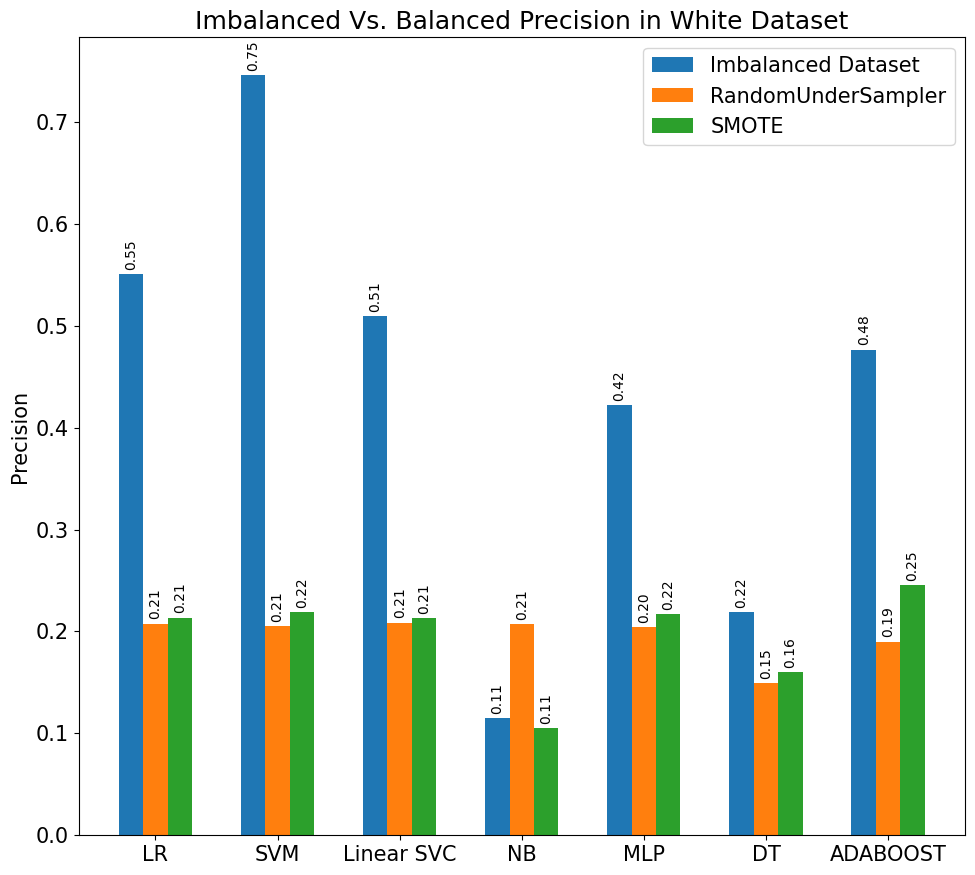

imbalancedVsbalanced_white_sensitivity.png


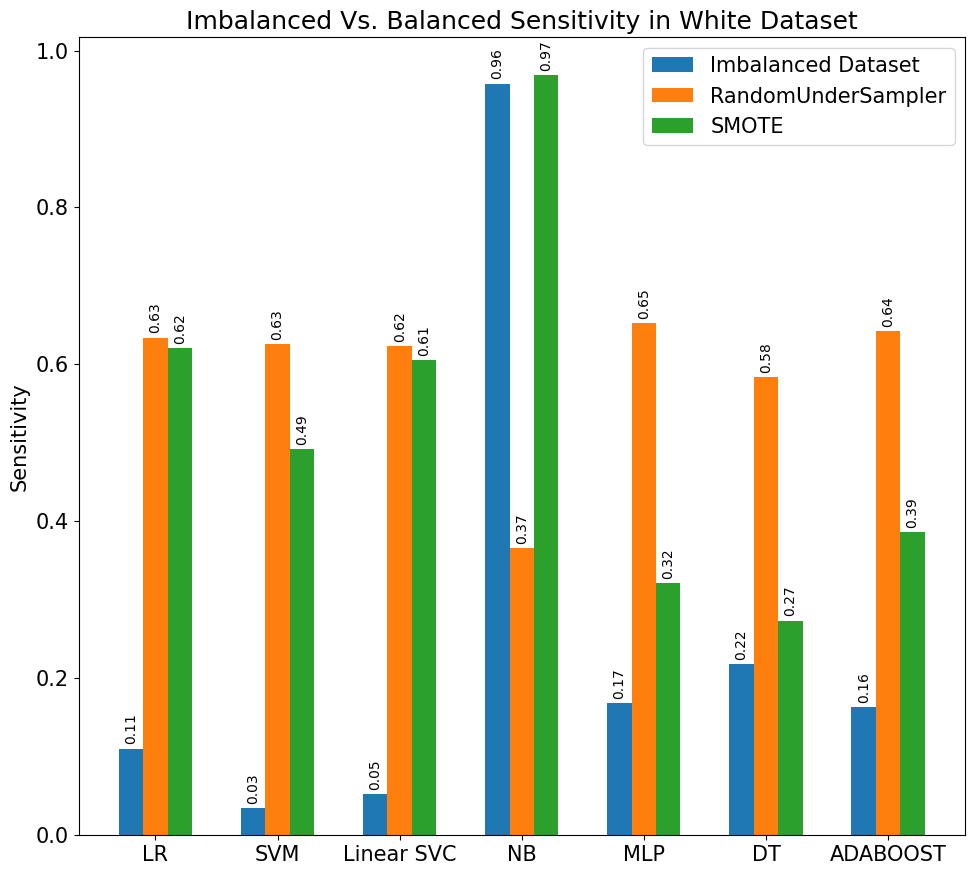

imbalancedVsbalanced_white_f1.png


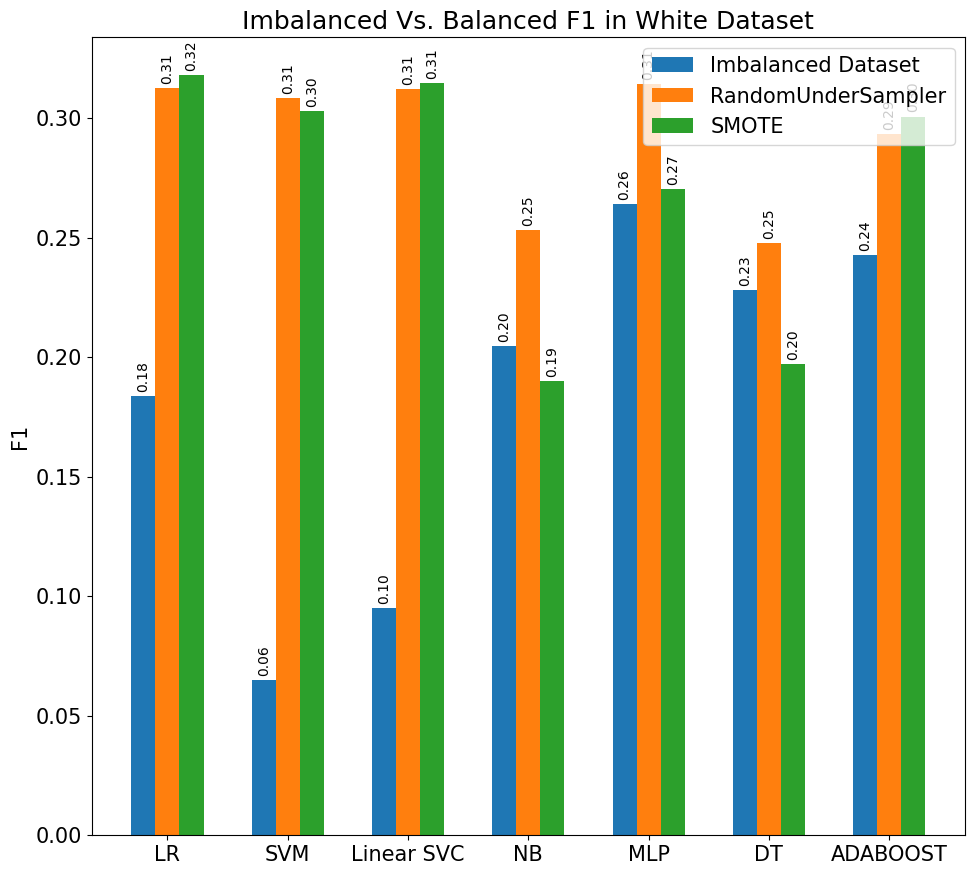

In [53]:
barChartBalancing(precision_white, precision_rus_white, precision_sm_white,
               "Precision", "Imbalanced Vs. Balanced Precision in White Dataset",
                 "imbalancedVsbalanced_white_precision")
barChartBalancing(recall_white, recall_rus_white, recall_sm_white,
                "Sensitivity", "Imbalanced Vs. Balanced Sensitivity in White Dataset",
                 "imbalancedVsbalanced_white_sensitivity")
barChartBalancing(f1_white, f1_rus_white, f1_sm_white,
                "F1", "Imbalanced Vs. Balanced F1 in White Dataset",
                 "imbalancedVsbalanced_white_f1")
barChartBalancing(f05_white, f05_rus_white, f05_sm_white,
                "F0.5", "Imbalanced Vs. Balanced F0.5 in White Dataset",
                 "imbalancedVsbalanced_white_f05")

imbalancedVsbalanced_asian_precision.png


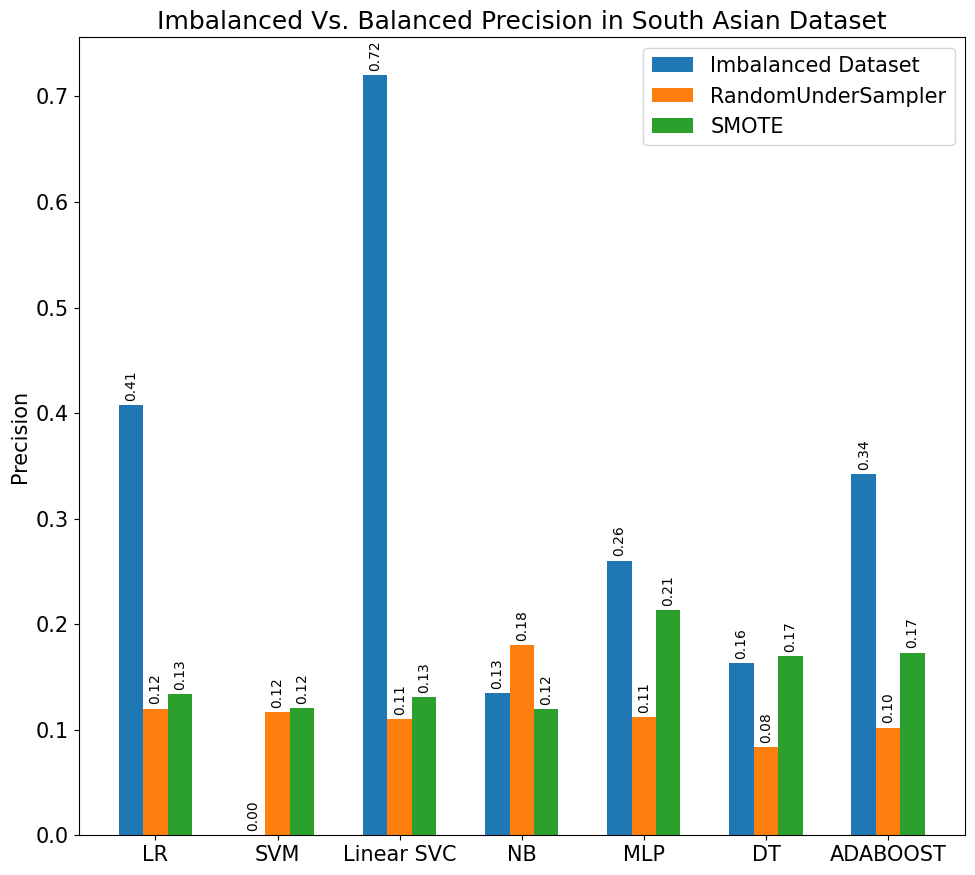

imbalancedVsbalanced_asian_sensitivity.png


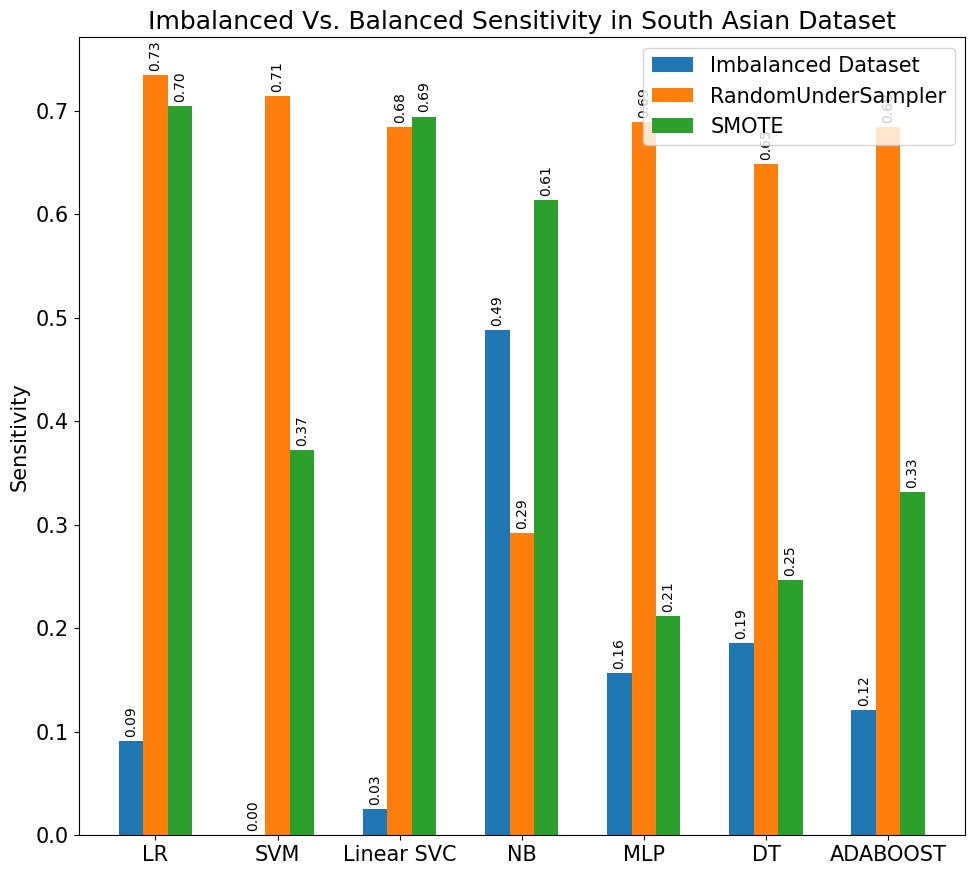

imbalancedVsbalanced_asian_f1.png


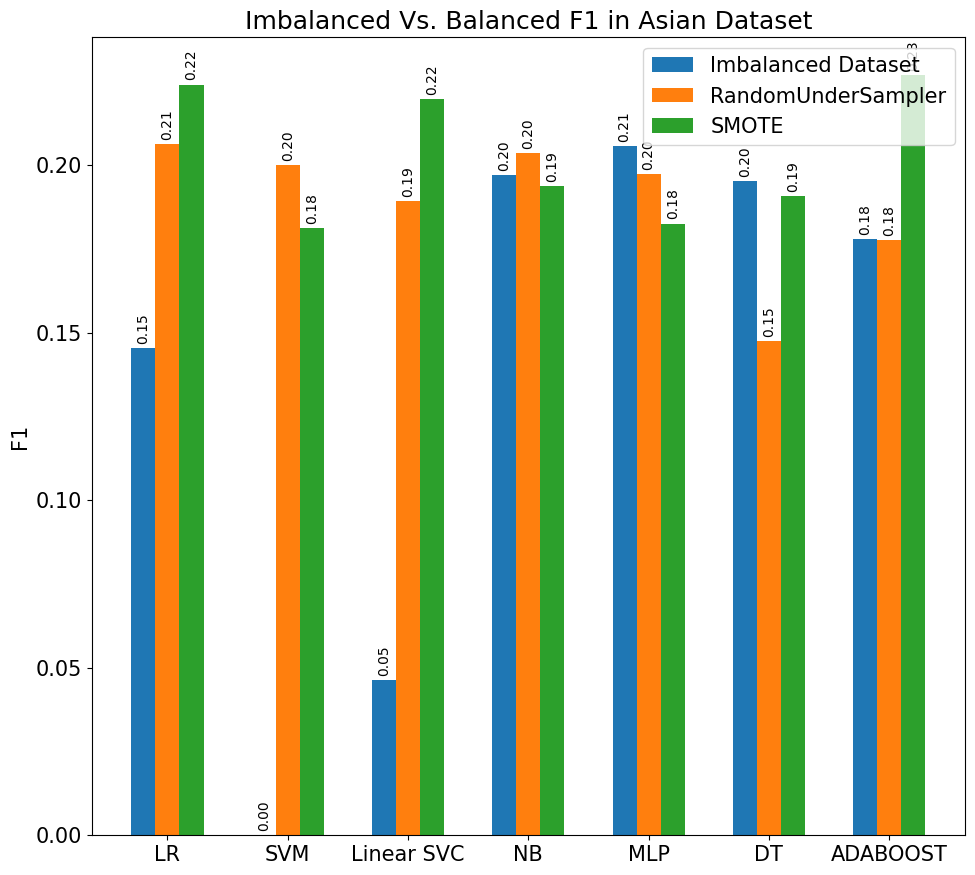

In [55]:
barChartBalancing(precision_asian, precision_rus_asian, precision_sm_asian,
                "Precision", "Imbalanced Vs. Balanced Precision in South Asian Dataset",
                 "imbalancedVsbalanced_asian_precision")
barChartBalancing(recall_asian, recall_rus_asian, recall_sm_asian,
                "Sensitivity", "Imbalanced Vs. Balanced Sensitivity in South Asian Dataset",
                 "imbalancedVsbalanced_asian_sensitivity")
barChartBalancing(f1_asian, f1_rus_asian, f1_sm_asian,
                "F1", "Imbalanced Vs. Balanced F1 in Asian Dataset",
                 "imbalancedVsbalanced_asian_f1")

Following data balancing, recall improves but precision drops.

# Testing

In [56]:
# define a function that will evaluate the model performance 
def evaluate_model(y_test, y_pred):
    from sklearn import metrics
    from sklearn.metrics import classification_report, confusion_matrix
    confusion = metrics.confusion_matrix(y_test, y_pred)
    
    import matplotlib.pyplot as plt
    import scikitplot as skplt
    disp  = skplt.metrics.plot_confusion_matrix(y_test, y_pred)
    disp.set_title("Confusion Matrix")
    plt.show()
    
    print(classification_report(y_test, y_pred))

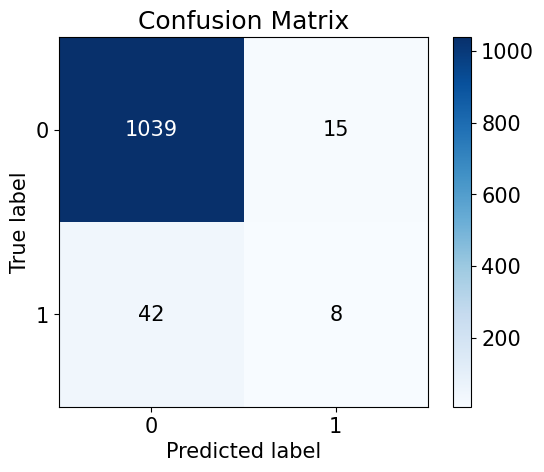

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1054
           1       0.35      0.16      0.22        50

    accuracy                           0.95      1104
   macro avg       0.65      0.57      0.60      1104
weighted avg       0.93      0.95      0.94      1104



In [57]:
# No upsampling

ada = AdaBoostClassifier(n_estimators=100, random_state=42)
ada.fit(X_train_asian,y_train_asian)
y_pred = ada.predict(X_test_asian) 
evaluate_model(y_test_asian, y_pred)

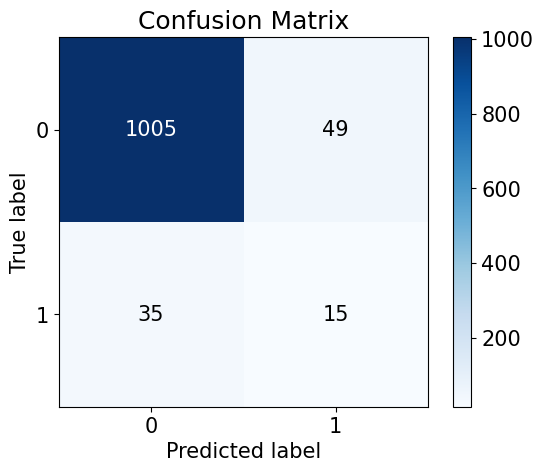

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      1054
           1       0.23      0.30      0.26        50

    accuracy                           0.92      1104
   macro avg       0.60      0.63      0.61      1104
weighted avg       0.93      0.92      0.93      1104



In [59]:
# SMOTE
from imblearn.over_sampling import SMOTE

# upsample minority class using SMOTE
sm = SMOTE(random_state=42)
X_train_sm, y_train_sm = sm.fit_sample(X_train_asian, y_train_asian)

# Define and fit AdaBoost classifier using upsample data 
ada_sm = AdaBoostClassifier(n_estimators=100, random_state=42)
ada_sm.fit(X_train_sm,y_train_sm)
y_pred_sm = ada_sm.predict(X_test_asian) 

# compare predicted outcome through AdaBoost upsampled data with real outcome
evaluate_model(y_test_asian, y_pred_sm)

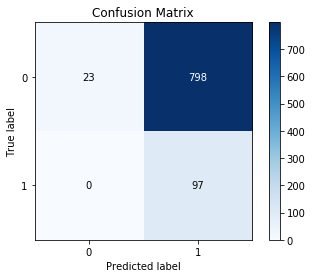

              precision    recall  f1-score   support

           0       1.00      0.03      0.05       821
           1       0.11      1.00      0.20        97

    accuracy                           0.13       918
   macro avg       0.55      0.51      0.13       918
weighted avg       0.91      0.13      0.07       918



In [31]:
# test NB algorithm
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train_white,y_train_white)
y_pred = gnb.predict(X_test_white) 
evaluate_model(y_test_white, y_pred)

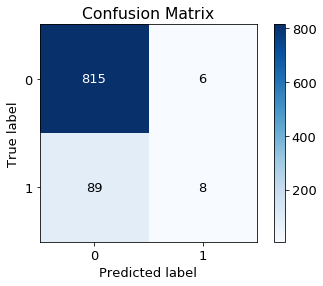

              precision    recall  f1-score   support

           0       0.90      0.99      0.94       821
           1       0.57      0.08      0.14        97

    accuracy                           0.90       918
   macro avg       0.74      0.54      0.54       918
weighted avg       0.87      0.90      0.86       918



In [71]:
# test NB algorithm
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train_white,y_train_white)
y_pred = rf.predict(X_test_white) 
evaluate_model(y_test_white, y_pred)

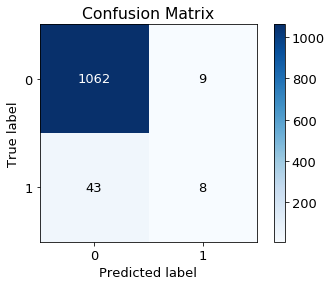

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1071
           1       0.47      0.16      0.24        51

    accuracy                           0.95      1122
   macro avg       0.72      0.57      0.61      1122
weighted avg       0.94      0.95      0.94      1122



In [72]:
# No upsampling

ada = AdaBoostClassifier(n_estimators=100, random_state=42)
ada.fit(X_train_asian,y_train_asian)
y_pred = ada.predict(X_test_asian) 
evaluate_model(y_test_asian, y_pred)

In [ ]:
# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

# Hyperparamter Tuning

In [219]:
def resampleAndTune(params, imba_pipeline, X_train, y_train, X_test, y_test):
    
    from sklearn.model_selection import GridSearchCV
    from sklearn.metrics import f1_score
    
    grid_resampler = GridSearchCV(imba_pipeline, param_grid=params, cv=skf, scoring="f1",
                        return_train_score=True)
    grid_resampler.fit(X_train, y_train);
    
    print("Best estimator selected by grid")
    print(grid_resampler.best_params_)
    
    print("How well do we do on our validation set?")
    print(grid_resampler.best_score_)
    
    print("Best estimator selected by grid")
    print(grid_resampler.best_params_)
    
    print("F1 score in test set")
    y_pred = grid_resampler.predict(X_test)
    f1_test = f1_score(y_test, y_pred)
    print(f1_test)

## AdaBoost

In [220]:
# Tune hyperparemters of AdaBoost using South Asian data and SMOTE resampling

In [232]:
params = {
    'n_estimators':[50, 100, 200, 300],
    'random_state': [42]
}

new_params = {'adaboostclassifier__' + key: params[key] for key in params}

In [231]:
from imblearn.pipeline import Pipeline, make_pipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=5, shuffle=False, random_state=42)

imba_pipeline = make_pipeline(SMOTE(random_state=42), 
                              AdaBoostClassifier(random_state=42))

resampleAndTune(new_params, imba_pipeline,
                X_train_asian, y_train_asian, 
                X_test_asian, y_test_asian)

Best estimator selected by grid
{'adaboostclassifier__n_estimators': 200, 'adaboostclassifier__random_state': 42}
How well do we do on our validation set?
0.27825629084515857
Best estimator selected by grid
{'adaboostclassifier__n_estimators': 200, 'adaboostclassifier__random_state': 42}
F1 score in test set
0.2708333333333333


In [243]:
f1_sm_asian

[0.21534942449940173,
 0.20935832660981085,
 0.1670613362774387,
 0.1757975923698775,
 0.23269280139460102,
 0.24308414050156335]

Now tune hyperparamtres of two best models in RUS White dataset:
RUS LR and RUS Linear SVC

## Logistic Regression

In [250]:
params = {
    'solver':['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'],
    'C': [0.01, 0.1, 1, 10, 100, 1000],
    'random_state': [42]
}

new_params = {'logisticregression__' + key: params[key] for key in params}

In [251]:
from imblearn.under_sampling import RandomUnderSampler

imba_pipeline = make_pipeline(RandomUnderSampler(random_state=42), 
                              LogisticRegression())

resampleAndTune(new_params, imba_pipeline,
                X_train_white, y_train_white, 
                X_test_white, y_test_white)

Best estimator selected by grid
{'logisticregression__C': 1, 'logisticregression__random_state': 42, 'logisticregression__solver': 'sag'}
How well do we do on our validation set?
0.33722268107199815
Best estimator selected by grid
{'logisticregression__C': 1, 'logisticregression__random_state': 42, 'logisticregression__solver': 'sag'}
F1 score in test set
0.35428571428571426


In [237]:
f1_rus_white

[0.33272922374602726,
 0.3292026831814335,
 0.23188775702876963,
 0.30216058442687965,
 0.24041139863903255,
 0.29947029231367545]

## SVC

In [258]:
params = {'kernel': ['poly', 'rbf', 'sigmoid'],
          'C': [50, 10, 1.0, 0.1, 0.01],
          'gamma': ['scale']}

new_params = {'svc__' + key: params[key] for key in params}

In [259]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.svm import SVC, LinearSVC

imba_pipeline = make_pipeline(RandomUnderSampler(random_state=42), 
                              LinearSVC(random_state=42))

resampleAndTune(new_params, imba_pipeline,
                X_train_white, y_train_white, 
                X_test_white, y_test_white)

Best estimator selected by grid
{'svc__C': 0.1, 'svc__gamma': 'scale', 'svc__kernel': 'poly'}
How well do we do on our validation set?
0.3339666079051554
Best estimator selected by grid
{'svc__C': 0.1, 'svc__gamma': 'scale', 'svc__kernel': 'poly'}
F1 score in test set
0.31884057971014496


In [265]:
params = {'C': [50, 10, 1.0, 0.1, 0.01],
          'class_weight': ['None', 'balanced']}

new_params = {'linearsvc__' + key: params[key] for key in params}

In [266]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.svm import SVC, LinearSVC

imba_pipeline = make_pipeline(RandomUnderSampler(random_state=42), 
                              LinearSVC(random_state=42))

resampleAndTune(new_params, imba_pipeline,
                X_train_white, y_train_white, 
                X_test_white, y_test_white)

Best estimator selected by grid
{'linearsvc__C': 0.1, 'linearsvc__class_weight': 'balanced'}
How well do we do on our validation set?
0.33793219917892064
Best estimator selected by grid
{'linearsvc__C': 0.1, 'linearsvc__class_weight': 'balanced'}
F1 score in test set
0.3515850144092219


In [306]:
precision_white

[0.6078210678210677,
 0.7233333333333333,
 0.10933643886655817,
 0.38173228770851864,
 0.21072650183589295,
 0.48096959584723764]

In [311]:
precision_asian

[0.6158369408369408,
 0.6,
 0.13894246067937707,
 0.3941176470588236,
 0.18337873361696388,
 0.39267080745341615]

In [ ]:
highest 72
lowest 11

In [317]:
recall_sm_white

[0.6243756243756244,
 0.6035964035964035,
 0.9196803196803197,
 0.2668331668331668,
 0.27985347985347986,
 0.38088578088578096]

In [316]:
recall_sm_asian

[0.6292682926829268,
 0.6097560975609756,
 0.6682926829268293,
 0.18536585365853658,
 0.27804878048780485,
 0.33170731707317075]

In [ ]:
high 92
low 19

In [325]:
precision_sm_white

[0.21548002259371252,
 0.2132658321653537,
 0.10364671418287666,
 0.21407571447465065,
 0.1935066356118988,
 0.28123940950566234]

In [324]:
precision_sm_asian

[0.12996666480550254,
 0.1264529669711181,
 0.09728556020569647,
 0.17654761395914076,
 0.19125364408639228,
 0.19243401066032284]

In [ ]:
highest 28
lowest 7